In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import plotly.express as px
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore') # Ignore warnings

## PCA and Clustering 

Delta Airlines' website have data on all of their aircraft in a certain site section.
In this analysis, we will investigate the different aircraft in Delta’s fleet. Which planes are similar? Which are dissimilar?

In [3]:
# We begin by loading inspecting the data
delta_data = pd.read_csv('delta.csv', index_col=0).reset_index()

In [4]:
delta_data.head()

,Aircraft,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
1,Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,...,1,0,0,0,0,1,1,1,0,0
2,Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
3,Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
4,Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,...,1,1,0,1,0,0,0,1,1,1


In [5]:
delta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Aircraft                  44 non-null     object 
 1   Seat Width (Club)         44 non-null     float64
 2   Seat Pitch (Club)         44 non-null     int64  
 3   Seat (Club)               44 non-null     int64  
 4   Seat Width (First Class)  44 non-null     float64
 5   Seat Pitch (First Class)  44 non-null     float64
 6   Seats (First Class)       44 non-null     int64  
 7   Seat Width (Business)     44 non-null     float64
 8   Seat Pitch (Business)     44 non-null     float64
 9   Seats (Business)          44 non-null     int64  
 10  Seat Width (Eco Comfort)  44 non-null     float64
 11  Seat Pitch (Eco Comfort)  44 non-null     float64
 12  Seats (Eco Comfort)       44 non-null     int64  
 13  Seat Width (Economy)      44 non-null     float64
 14  Seat Pitch (

### check correlation with visualization
Visualize pairwise correlation using scatterplot for columns ``'Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)'`` (i.e., columns 16-23 in ``delta_data``)

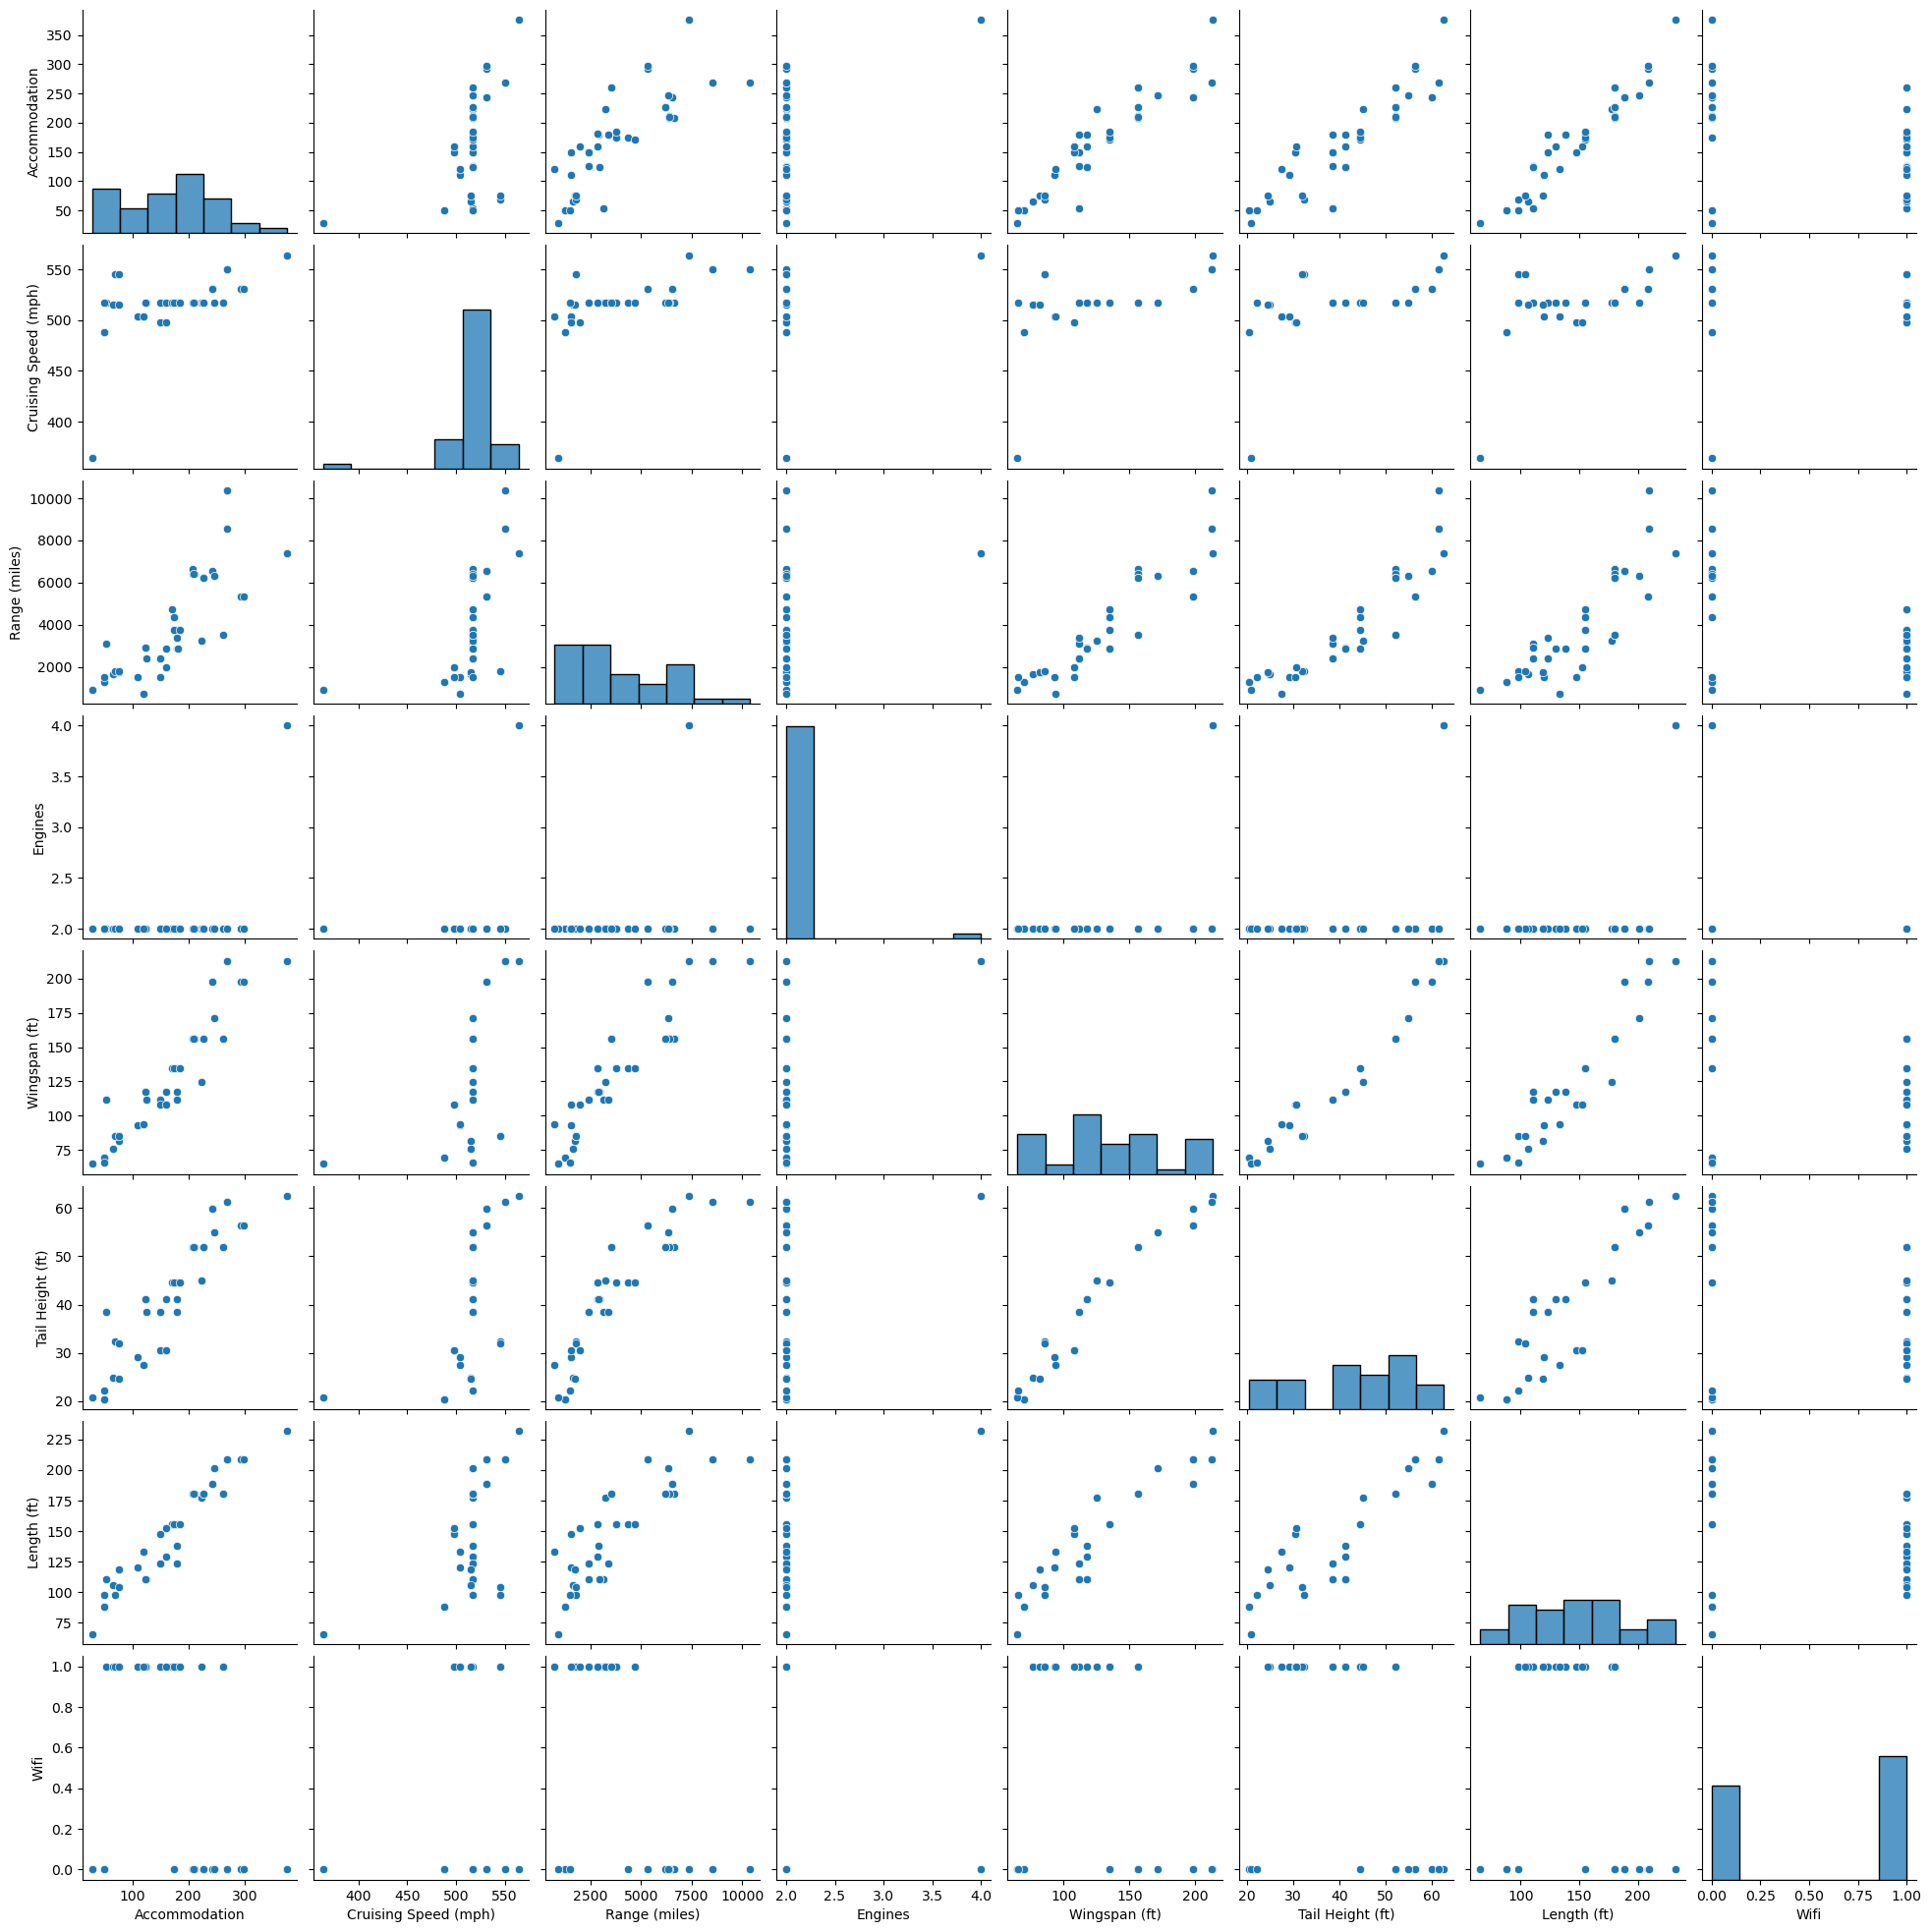

In [9]:
columns_to_visualize = delta_data.columns[16:24]
sns.pairplot(delta_data[columns_to_visualize], kind='scatter')
plt.show()

- Identify all binary columns (i.e., a binary column is the column that only contains ``0`` and ``1`` as values)

- Generate a dataframe ``X`` removing these binary columns and column ``Aircraft`` (since this is the ``y``)

In [15]:
binary_columns = []

for column in delta_data.columns:
    unique_values = delta_data[column].unique()
    if set(unique_values) == {0, 1}:
        binary_columns.append(column)
print("Binary Columns:", binary_columns)

Binary Columns: ['Wifi', 'Video', 'Power', 'Satellite', 'Flat-bed', 'Sleeper', 'Club', 'First Class', 'Business', 'Eco Comfort', 'Economy']


In [14]:
binary_columns = ['Wifi', 'Video', 'Power', 'Satellite', 'Flat-bed', 'Sleeper', 'Club', 'First Class',\
                  'Business', 'Eco Comfort', 'Economy']
X = delta_data.drop(columns=binary_columns + ["Aircraft"])
X.head(5)

,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),Seat Width (Eco Comfort),...,Seat Width (Economy),Seat Pitch (Economy),Seats (Economy),Accommodation,Cruising Speed (mph),Range (miles),Engines,Wingspan (ft),Tail Height (ft),Length (ft)
0,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,17.2,30.5,96,126,517,2399,2,111.83,38.583,111.00
1,19.4,44,12,19.4,40.0,28,21.0,59.0,14,0.0,...,0.0,0.0,0,54,517,3119,2,111.83,38.583,111.00
2,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,17.2,31.5,120,150,517,2420,2,111.83,38.583,123.25
3,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,17.2,31.5,120,150,517,2420,2,111.83,38.583,123.25
4,0.0,0,0,0.0,0.0,0,21.0,60.0,32,18.0,...,18.0,30.5,181,243,531,6536,2,197.83,59.830,188.67


### PCA
- Standardize X
- conduct PCA 
- calculate the amount of varialce each principal component explain, as well as the cumulative sum
- visualize the cumulative sum of explained variance and set the xticks as the number of components


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
X_normalized = StandardScaler().fit_transform(X)

In [22]:
pca = PCA().fit(X_normalized)

[4.63148487e-01 2.51071052e-01 1.61265689e-01 4.68733864e-02
 3.60892657e-02 1.84418981e-02 9.47340752e-03 4.34022199e-03
 3.28954319e-03 1.43450053e-03 1.20846026e-03 9.51526552e-04
 7.88782498e-04 6.43276642e-04 3.88597783e-04 2.71942151e-04
 1.68280380e-04 1.11848384e-04 2.93264482e-05 1.05081889e-05
 6.25431196e-33 3.99076237e-36]
[0.46314849 0.71421954 0.87548523 0.92235861 0.95844788 0.97688978
 0.98636318 0.99070341 0.99399295 0.99542745 0.99663591 0.99758744
 0.99837622 0.9990195  0.99940809 0.99968004 0.99984832 0.99996017
 0.99998949 1.         1.         1.        ]


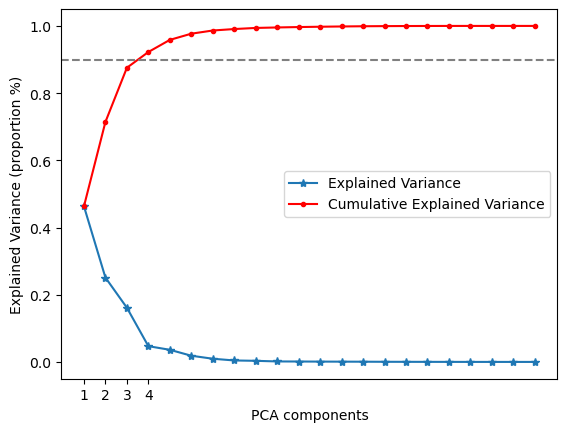

In [28]:
# Exercise: Visualizing the result. Use line plot to show the cummulative explained variance ratio; 

exp_var = pca.explained_variance_ratio_ 
print(exp_var)

# cumulative sum of variance explained
exp_var_cumsum = np.cumsum(exp_var)
print(exp_var_cumsum)


plt.plot(range(1, len(exp_var)+1),
        exp_var,'*-',label='Explained Variance')

plt.plot(range(1, len(exp_var)+1),
        exp_var_cumsum,'r.-',label='Cumulative Explained Variance')



plt.legend()
ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xlabel('PCA components')
ax.set_ylabel('Explained Variance (proportion %)')

# which shows that the first two PCs accounts for more than 90% of the variance of the data.
plt.axhline(0.9,linestyle='--',color='grey')

### Clustering Analysis

So, now that we’ve simplified the complex data set into a lower dimensional space we can visualize and
work with, we will use clustering to find patterns in the data, in our case, the aircraft which are most
similar? 

- Pick the number of components which explain 90% (or a little greater) of the variation and represent the transformed data (projected onto the selected principal components) as ``components``

- Using ``components`` as the input, run k-means for k from ``2`` to ``15`` (with ``random_state=1``), and visualize SSE by elbow curve.

- Select the best k using elbow curve and run clustering with the selected k to get the cluster assignment

-  Visualize the cluster membership by scatter plots (for each pair of principle components as ``x`` and ``y`` axes)



In [38]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.90) + 1
components = PCA(n_components=n_components).fit_transform(X_normalized)

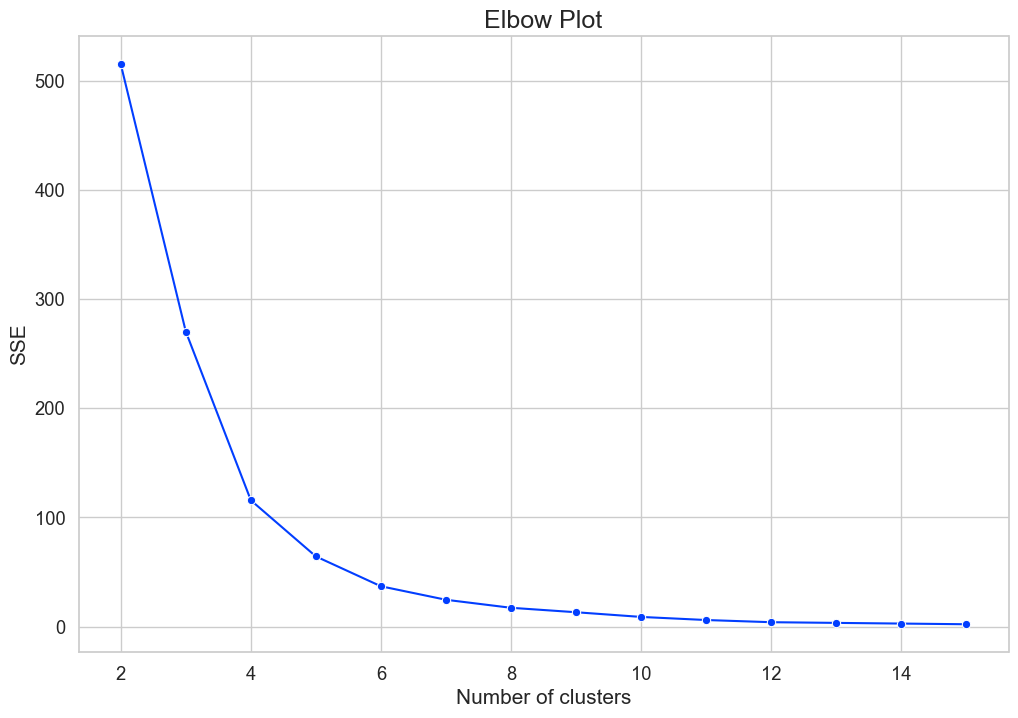

In [43]:
from sklearn.cluster import KMeans

# Function for plotting elbow curve
def plot_elbow_curve(start, end, data):
    no_of_clusters = list(range(start, end+1))
    sse = []  # Initialize a list to store the SSE values

    for k in no_of_clusters:
        cluster_model = KMeans(n_clusters=k, random_state=1)
        cluster_model.fit(data)
        sse.append(cluster_model.inertia_)  # Inertia is the SSE value

    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    plt.figure(figsize=(12, 8))
    ax = sns.lineplot(x=no_of_clusters, y=sse, marker="o", dashes=False)
    ax.set_title('Elbow Plot', fontsize=18)
    ax.set_xlabel('Number of clusters', fontsize=15)
    ax.set_ylabel('SSE', fontsize=15)
    plt.plot()

# Plotting elbow curve for k=2 to k=15 using X_transformed (or X_normalized)
plot_elbow_curve(start=2, end=15, data=components)

In [44]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=1)
cluster_assignments = kmeans.fit_predict(components)

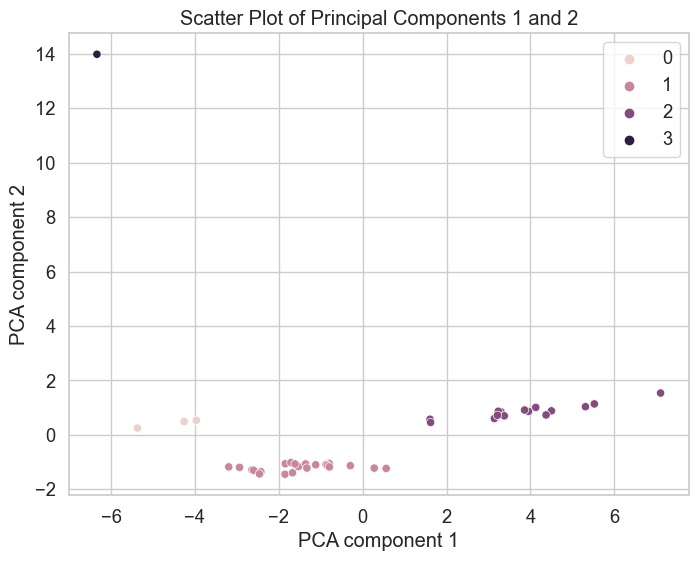

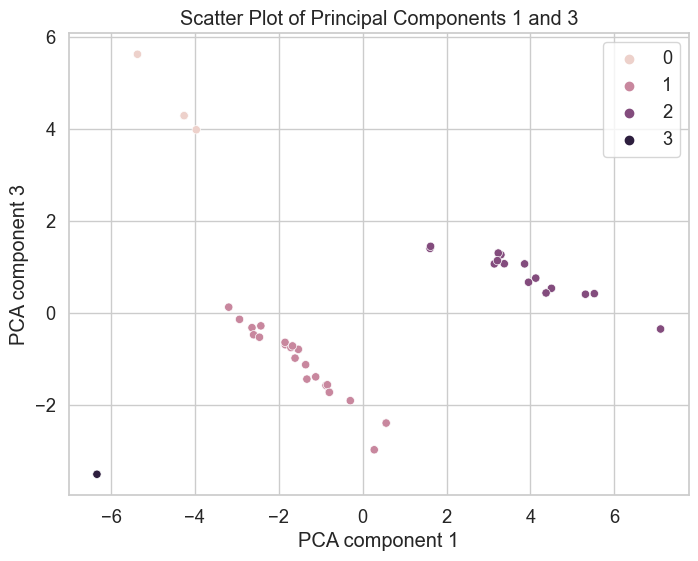

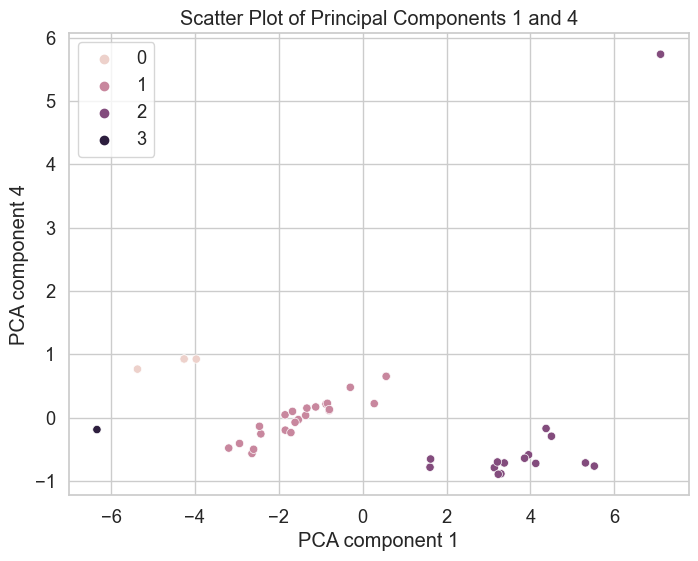

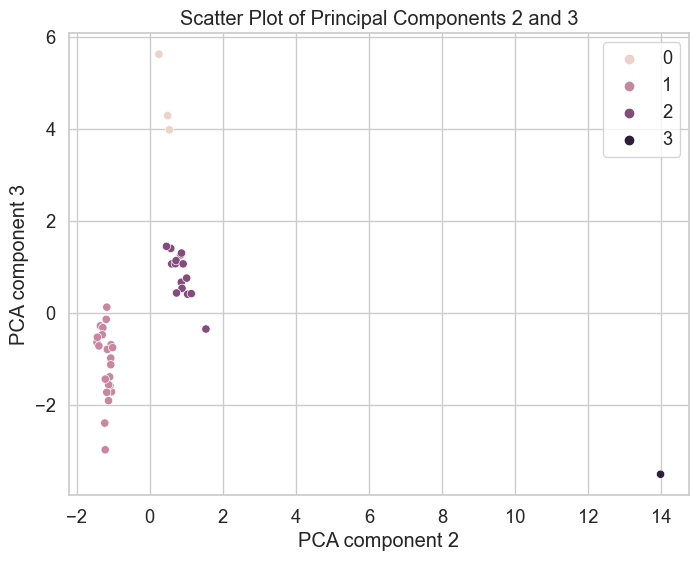

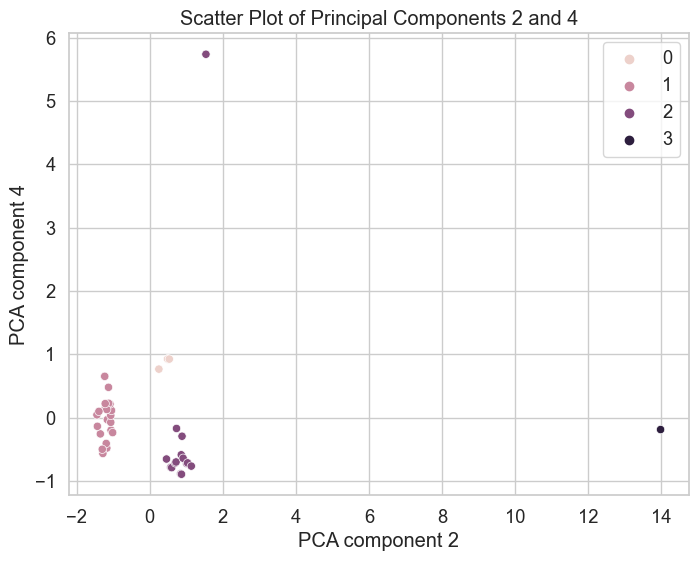

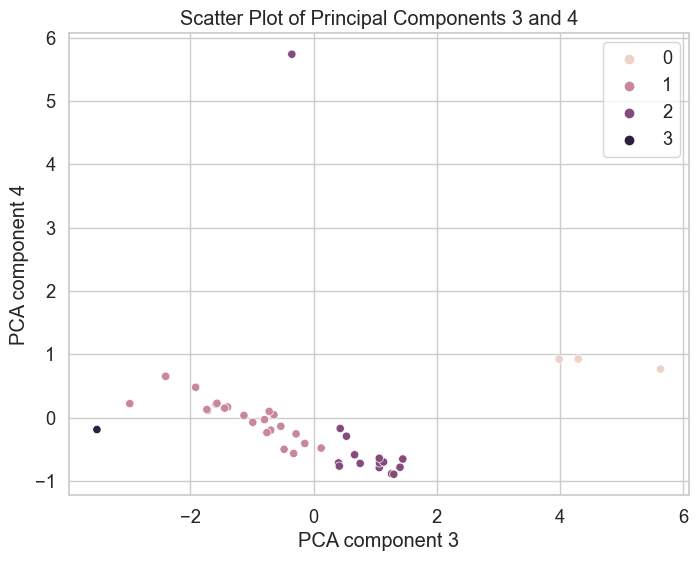

In [47]:
n_components = components.shape[1]

# Iterate through all pairs of principal components
for i in range(n_components - 1):
    for j in range(i + 1, n_components):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=components[:, i], y=components[:, j], hue=cluster_assignments)
        plt.xlabel(f'PCA component {i + 1}')
        plt.ylabel(f'PCA component {j + 1}')
        plt.title(f'Scatter Plot of Principal Components {i + 1} and {j + 1}')
        plt.show()